<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/Principal_Components_Regression_and_Partial_Least_Squares_in_Bioinformatics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simulated Bioinformatics Data - X Shape: (100, 50), Y Shape: (100,)


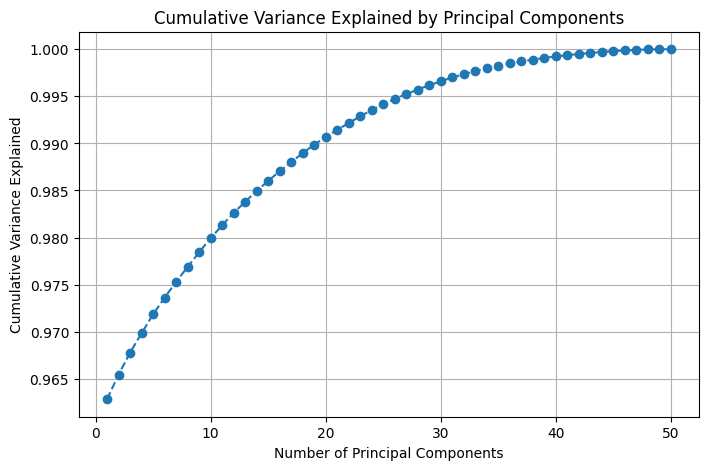

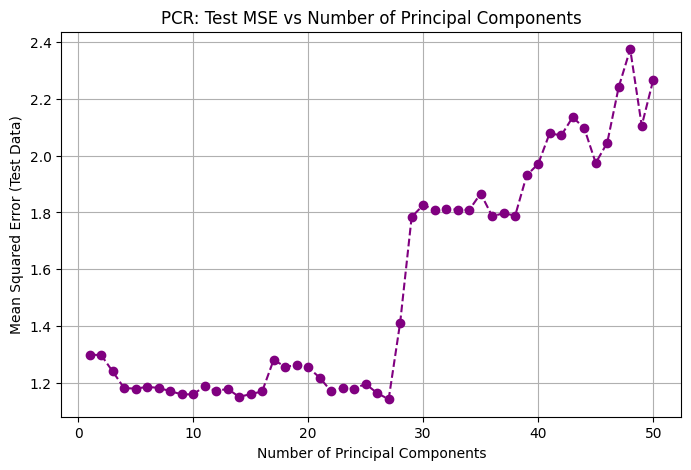

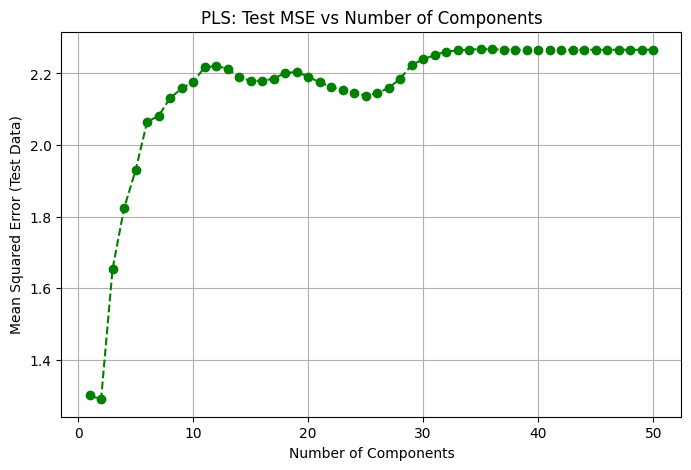

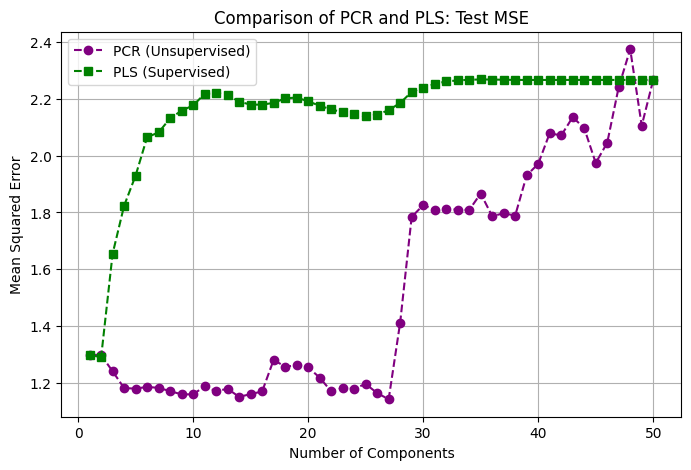

In [1]:
# Step 1: Import Libraries
# These libraries are essential for data manipulation, visualization, and modeling.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA  # For Principal Components Analysis
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression  # For Partial Least Squares
from sklearn.metrics import mean_squared_error

# Setting random seed for reproducibility
np.random.seed(42)

# Step 2: Simulate High-Dimensional Bioinformatics Data
# I simulate a dataset with 100 samples (observations) and 50 predictors (genes, biomarkers, etc.).
# The response variable (Y) could represent a biological outcome, such as disease progression.

n_samples = 100
n_features = 50

# Generating a feature matrix (X) with correlated predictors
X = np.random.normal(0, 1, (n_samples, n_features))
# Introducing correlation between predictors
X[:, 1:] = X[:, 0][:, np.newaxis] + np.random.normal(0, 0.2, (n_samples, n_features - 1))

# Generating a response variable (Y) influenced by a subset of predictors
coefficients = np.array([0.5] * 5 + [0] * (n_features - 5))  # Only the first 5 predictors matter
Y = X @ coefficients + np.random.normal(0, 1, n_samples)  # Adding some noise to simulate real data

print(f"Simulated Bioinformatics Data - X Shape: {X.shape}, Y Shape: {Y.shape}")

# Step 3: Split Data into Training and Testing Sets
# A train-test split ensures I evaluate model performance on unseen data.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Step 4: Principal Components Regression (PCR)
# PCR involves two main steps: (1) Performing PCA to reduce dimensionality and
# (2) Using the principal components in a regression model.

# Performing PCA on the training data
pca = PCA()
X_train_pca = pca.fit_transform(X_train)  # Transform training data
X_test_pca = pca.transform(X_test)       # Transform testing data

# Calculate variance explained for visualization
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Visualize the variance explained by the principal components
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_features + 1), explained_variance, marker='o', linestyle='--')
plt.title("Cumulative Variance Explained by Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.grid()
plt.show()

# Fitting regression models using increasing numbers of principal components
mse_pcr = []  # To store Mean Squared Errors for each model
for n_components in range(1, n_features + 1):
    # Using first 'n_components' principal components
    X_train_reduced = X_train_pca[:, :n_components]
    X_test_reduced = X_test_pca[:, :n_components]

    # Linear regression on principal components
    model = LinearRegression()
    model.fit(X_train_reduced, Y_train)
    Y_pred = model.predict(X_test_reduced)

    # Calculating Mean Squared Error
    mse = mean_squared_error(Y_test, Y_pred)
    mse_pcr.append(mse)

# Visualize Test Error for Different Numbers of Components
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_features + 1), mse_pcr, marker='o', linestyle='--', color='purple')
plt.title("PCR: Test MSE vs Number of Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Mean Squared Error (Test Data)")
plt.grid()
plt.show()

# Interpretation:
# - The test error decreases as the number of principal components increases initially.
# - Beyond a certain point (e.g., 15-20 components), the improvement becomes minimal,
#   reflecting the U-shaped bias-variance tradeoff.

# Step 5: Partial Least Squares (PLS)
# PLS selects directions (components) that maximize covariance between X and Y.
# This makes PLS supervised, unlike PCR.

# Initialize lists to store PLS MSEs
mse_pls = []

# Fitting PLS models using increasing numbers of components
for n_components in range(1, min(n_samples, n_features) + 1):
    pls = PLSRegression(n_components=n_components)
    pls.fit(X_train, Y_train)  # Fitting PLS on training data
    Y_pred = pls.predict(X_test)  # Predicting on testing data
    mse = mean_squared_error(Y_test, Y_pred)  # Calculating test MSE
    mse_pls.append(mse)

# Visualize Test Error for Different Numbers of Components (PLS)
plt.figure(figsize=(8, 5))
plt.plot(range(1, min(n_samples, n_features) + 1), mse_pls, marker='o', linestyle='--', color='green')
plt.title("PLS: Test MSE vs Number of Components")
plt.xlabel("Number of Components")
plt.ylabel("Mean Squared Error (Test Data)")
plt.grid()
plt.show()

# Interpretation:
# - The test MSE decreases and stabilizes after selecting around 10 components.
# - PLS generally performs similarly to PCR but often converges faster due to its supervised nature.

# Step 6: Compare PCR and PLS
# Plot PCR and PLS MSEs together for comparison
plt.figure(figsize=(8, 5))
plt.plot(range(1, n_features + 1), mse_pcr, marker='o', linestyle='--', label='PCR (Unsupervised)', color='purple')
plt.plot(range(1, min(n_samples, n_features) + 1), mse_pls, marker='s', linestyle='--', label='PLS (Supervised)', color='green')
plt.title("Comparison of PCR and PLS: Test MSE")
plt.xlabel("Number of Components")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid()
plt.show()

# Final Thoughts:
# - PCR reduces dimensionality using directions of maximum variance in X, which can be effective
#   when X is highly correlated but ignores the response Y.
# - PLS incorporates the response Y while creating components, often leading to faster convergence.
# - In this bioinformatics example, PLS achieves slightly better test MSE with fewer components,
#   highlighting its advantage in supervised settings.
